#### <font color = red>Coding up a **region of Interest** Mask</font>
> 
* assume that the camera that have took the image is mounted in fixed position on the front of the car. Therefore, the lane lines will appear in the same general region of the image.
* Here I'm using a triangular mask to illustrate the simplest case, but later you'll use a quadrilateral, and in principle, you could use any polygon.

The image is: <class 'numpy.ndarray'> dimensions (540, 960, 4)
x: 960 y: 540


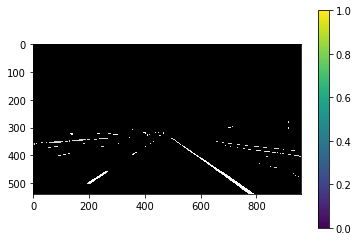

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
# read the image and collect stats
image= mpimg.imread('./datasets/test-after.png')
print('The image is:',type(image),'dimensions', image.shape)
plt.imshow(image)
plt.colorbar()
#pull out x & y sizes and make a copy of it
y_size = image.shape[0]
x_size = image.shape[1]
region_select= np.copy(image)
print('x:',x_size,'y:',y_size)

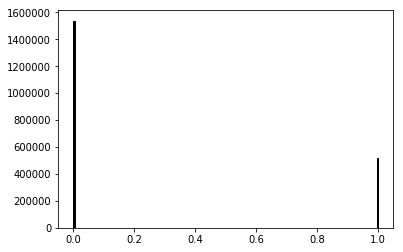

In [2]:
plt.hist(image.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

> Define a triangle (region of interest)
* Keep in mind the origin (x=0, y=0) is in the upper left in **image processing**

* np.polyfit() returns coef. A& B of a line(fit). what's significance of it here? 
* Q2I : I understood that region_threshold is carving out the area under the lines. I have hard time creating a logical mapping from these equation. I tried first with lower bottom left corner, but later I get confused when I read the point that in image processing the origin is in upper left corner. could you please help?

lines coefs.:
 [   1.9962963 -539.       ] 
 [  5.92736380e-17  -5.39000000e+02] 
 [  -0.78229318  211.2191582 ]
Square Grid shape:
 (540, 960) 
 (540, 960)


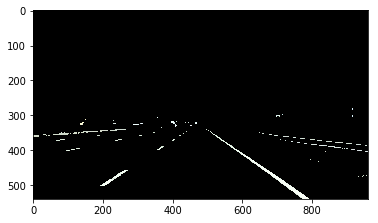

In [3]:
left_bottom = [0,-539]
apex = [270,0]
right_bottom= [959,-539]
# fit lines (y= Ax+B) to identify the area of interest 
fit_left   = np.polyfit( (left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit( (left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
fit_right  = np.polyfit( (right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)                    

print('lines coefs.:\n',fit_left,'\n',fit_bottom,'\n', fit_right)
# find the area inside the lines
XX, YY = np.meshgrid( np.arange(0,x_size), np.arange(0,y_size) )
print('Square Grid shape:\n',XX.shape,'\n',YY.shape)
region_threshold = ( YY > (XX* fit_left[0] + fit_left[1]) ) \
                    & ( YY > (XX* fit_right[0] + fit_right[1])) \
                    & ( YY < (XX* fit_bottom[0] + fit_bottom[1]))

# color the pixels with red which are inside the region of interest
region_select[region_threshold]= [255,0,0,0]
#displey the image
plt.imshow(region_select)
plt.show()

In [4]:
print(region_threshold.shape)
print(region_select.shape)

(540, 960)
(540, 960, 4)


In [ ]:
Hello paolo,
I understood now, There is a small mistake in the code provided by Udacity in 5th heading. 